<a href="https://colab.research.google.com/github/JuanColonGarcia/JuanColonGarcia/blob/main/Credit_Card_Transactions_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2)CLASIFICATION

## 2.1) Dataset

Cargamos librerias necesarias

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [30]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
import kagglehub
import os

path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)


files = os.listdir(path)
print("Archivos en el dataset descargado:", files)



Path to dataset files: /root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1
Archivos en el dataset descargado: ['fraudTest.csv', 'fraudTrain.csv']


In [32]:
csv_file = os.path.join(path, 'fraudTest.csv')

df = pd.read_csv(csv_file)


Se observa el dataset.

In [33]:
#TAMAÑO DE DATASET(FILAS Y COLUMNAS)
print(df.shape)


(555719, 23)


In [34]:
#MUESTRA LOS PRIMEROS DATOS, PARA COMPROBACION RAPIDA
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 2.2)Preparación de datos

Para mejor las características, se traducen al castellano.

In [36]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [37]:
# Cambiamos los nombres en inglés a castellano
df1 = df.rename(columns={"Unnamed: 0": "ID",
                              "trans_date_trans_time": "Fecha",
                              "cc_num": "Numero",
                              "merchant": "Comerciante",
                              "category": "Categoria",
                              "amt": "Precio",
                              "first": "Nombre",
                              "last": "Apellido",
                              "gender": "Genero",
                              "Careless": "Descuido",
                              "street": "Calle",
                              "city": "Ciudad",
                              "state": "Estado",
                              "zip": "dormitorios",
                              "lat": "Latitud",
                              "Unknown": "Unknown",
                              "long": "Longitud",
                              "city_pop": "Numero_postal",
                              "job": "Trabajo",
                              "dob": "Fecha_nacimiento",
                              "trans_num": "Numero_transferencia",
                              "unix_time": "Tiempo_unix",
                              "merch_lat": "Merch_latitud",
                              "merch_long": "Merch_longitud",
                              "is_fraud": "Es_un_fraude",
                              "email_is_free": "Email_gratuito"})
df1


,ID,Fecha,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,...,Latitud,Longitud,Numero_postal,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [38]:
#Imprime un resumen del dataframe,
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    555719 non-null  int64  
 1   Fecha                 555719 non-null  object 
 2   Numero                555719 non-null  int64  
 3   Comerciante           555719 non-null  object 
 4   Categoria             555719 non-null  object 
 5   Precio                555719 non-null  float64
 6   Nombre                555719 non-null  object 
 7   Apellido              555719 non-null  object 
 8   Genero                555719 non-null  object 
 9   Calle                 555719 non-null  object 
 10  Ciudad                555719 non-null  object 
 11  Estado                555719 non-null  object 
 12  dormitorios           555719 non-null  int64  
 13  Latitud               555719 non-null  float64
 14  Longitud              555719 non-null  float64
 15  

In [39]:
#Genera estadisticas descriptivas del programa
df1.describe()

,ID,Numero,Precio,dormitorios,Latitud,Longitud,Numero_postal,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [20]:
# Vamos a observar si hay algún dato nulo
df1.isnull().sum()

,0
ID,0
Fecha,0
Numero,0
Comerciante,0
Categoria,0
Precio,0
Nombre,0
Apellido,0
Genero,0
Calle,0


Se comprueba si existen valores ambiguos dentro del dataset, esto es, datos del mismo tipo que tienen diferente formato (ej: mayúsculas y minúsculas).

In [40]:
# Recorremos todas las columnas para que nos visualice todos los posibles valores de cada una de ellas.
for columna in df1.columns:
  valores = pd.unique(df1[columna])
  print('Columna: ' + columna + ' ------ Valores: ' + str(valores))

Columna: ID ------ Valores: [     0      1      2 ... 555716 555717 555718]
Columna: Fecha ------ Valores: ['2020-06-21 12:14:25' '2020-06-21 12:14:33' '2020-06-21 12:14:53' ...
 '2020-12-31 23:59:15' '2020-12-31 23:59:24' '2020-12-31 23:59:34']
Columna: Numero ------ Valores: [   2291163933867244    3573030041201292    3598215285024754
    3591919803438423    3526826139003047      30407675418785
     213180742685905    3589289942931264    3596357274378601
    3546897637165774    2242542703101233        571465035400
    6593250708747804       4988304376504    6011504998544485
    4570636521433188 4906628655840914250    4908846471916297
 4861310130652566408    6538441737335434    2283743876903625
 4560004149983868183       4562827002127     213153151785052
     372509258176510    6011148190095209    6011917798331152
    3577663406369449    3502377050801561     180040027502291
     379897244598068     180048185037117    4302475216404898
     180036456789979     180065479077096    6517217

Se observa como la descripción es completamente distinta en cada una de ellas, lo unico que se parece es la parte de bedroom, pero al ser una columna que ya está implementada no es necesario es acolumna, así que se eliminará

Además por sentido comun, no voy a utilizar unamed 0 como un Id, ya que el dataset ya tiene el id de cada fila

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    555719 non-null  int64  
 1   Fecha                 555719 non-null  object 
 2   Numero                555719 non-null  int64  
 3   Comerciante           555719 non-null  object 
 4   Categoria             555719 non-null  object 
 5   Precio                555719 non-null  float64
 6   Nombre                555719 non-null  object 
 7   Apellido              555719 non-null  object 
 8   Genero                555719 non-null  object 
 9   Calle                 555719 non-null  object 
 10  Ciudad                555719 non-null  object 
 11  Estado                555719 non-null  object 
 12  dormitorios           555719 non-null  int64  
 13  Latitud               555719 non-null  float64
 14  Longitud              555719 non-null  float64
 15  

In [42]:
df2 = df1.drop(['ID'], axis = 1)

df2

,Fecha,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,...,Latitud,Longitud,Numero_postal,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [43]:
df2.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
555714,False
555715,False
555716,False
555717,False


In [44]:
print(df2.shape)

(555719, 22)


In [45]:
df3 = df2.drop_duplicates()

In [46]:
df3.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
555714,False
555715,False
555716,False
555717,False


In [47]:
print(df3.shape)

(555719, 22)


In [48]:
df3.dtypes

,0
Fecha,object
Numero,int64
Comerciante,object
Categoria,object
Precio,float64
Nombre,object
Apellido,object
Genero,object
Calle,object
Ciudad,object


### **FECHA**

In [49]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df2.Fecha.value_counts()


,count
Fecha,
2020-12-19 16:02:22,4
2020-12-13 17:53:47,4
2020-12-17 20:36:39,4
2020-10-05 19:37:49,4
2020-12-27 01:22:37,3
...,...
2020-08-25 13:15:57,1
2020-08-25 13:15:37,1
2020-08-25 13:15:22,1


In [50]:
df2['Fecha'] = pd.to_datetime(df2['Fecha'])


In [51]:
df2['nueva_fecha'] = [d.date() for d in df2['Fecha']]
df2['nueva_hora'] = [d.time() for d in df2['Fecha']]
df2

,Fecha,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,...,Numero_postal,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020-12-31,23:59:07
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23:59:09
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23:59:15
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020-12-31,23:59:24


In [52]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df2.nueva_fecha.value_counts()


,count
nueva_fecha,
2020-11-30,6530
2020-12-07,6506
2020-12-14,6400
2020-12-21,6390
2020-12-28,6321
...,...
2020-09-23,1494
2020-11-25,1488
2020-09-09,1479


In [53]:
df2.nueva_hora.value_counts()


,count
nueva_hora,
17:47:40,21
16:11:17,21
22:20:54,21
14:28:33,21
12:07:14,20
...,...
11:58:08,1
09:35:34,1
01:06:09,1


In [54]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df2['nueva_fecha']= label_encoder.fit_transform(df2['nueva_fecha'])

df2['nueva_fecha'].unique()



array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [55]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df2['nueva_hora']= label_encoder.fit_transform(df2['nueva_hora'])

df2['nueva_hora'].unique()

array([43779, 43787, 43807, ..., 35179, 40380, 40513])

In [56]:
df2

,Fecha,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,...,Numero_postal,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056


In [57]:
df3 = df2.drop(['Fecha'], axis = 1)

df3

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Numero_postal,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056


### **COMERCIANTE**

In [58]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df3.Comerciante.value_counts()


,count
Comerciante,
fraud_Kilback LLC,1859
fraud_Cormier LLC,1597
fraud_Schumm PLC,1561
fraud_Kuhn LLC,1521
fraud_Dickinson Ltd,1519
...,...
fraud_Treutel-King,323
fraud_Satterfield-Lowe,319
fraud_Kessler Group,318


In [59]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df3['Comerciante']= label_encoder.fit_transform(df3['Comerciante'])

df3['Comerciante'].unique()


array([319, 591, 611, 222, 292, 126, 526, 500, 201, 315, 170, 197, 100,
        34, 398, 662, 252, 369, 437, 489, 109, 621, 646, 656, 378, 258,
       366, 154, 382, 296, 164, 689, 451, 402, 551, 264,  81, 506, 435,
       496, 167, 112,  15, 333, 683,  10, 180,  89,  56, 145, 248, 132,
       449, 461, 457,  28, 536,  45, 663,   5, 484, 220, 690, 679,  38,
       310, 174, 561, 209, 199, 144, 213, 657,  23, 485, 368, 615, 619,
       348, 547, 520, 599, 469, 262,  85, 313, 400, 320, 492, 207,  14,
       257, 675,  76, 179,  33, 515, 452, 557, 490, 571,  46, 531, 314,
       433,  67, 226,  74, 187, 409,  41,   1, 165, 391, 191, 596, 111,
       323, 113, 644,  84, 151, 671, 544, 576, 448,  13, 388,  22, 456,
        61, 460, 104, 362, 139, 660, 541, 123, 312, 421, 651, 136, 392,
       546,   8, 565, 629, 253, 148, 234, 397, 161, 343, 384, 552,  54,
       636, 668, 190, 633, 558, 672, 420,  75, 614, 540, 171, 317, 102,
       574, 512, 529, 418, 125, 192,  95, 532, 471, 188,  69, 64

In [60]:
df4 = df3

### **CATEGORIA**

In [61]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df4.Categoria.value_counts()


,count
Categoria,
gas_transport,56370
grocery_pos,52553
home,52345
shopping_pos,49791
kids_pets,48692
shopping_net,41779
entertainment,40104
personal_care,39327
food_dining,39268


In [62]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df4['Categoria']= label_encoder.fit_transform(df4['Categoria'])

df4['Categoria'].unique()

array([10,  5,  9, 13,  7, 12,  1,  6,  0, 11,  8,  4,  2,  3])

In [67]:
df5 = df4

### **NOMBRE**/**APELLIDO**

In [68]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df5.Nombre.value_counts()


,count
Nombre,
Christopher,11443
Robert,9076
Jessica,8655
David,8599
Michael,8530
...,...
Mike,199
Dennis,12
Evan,12


In [69]:
df5['Nombre_completo'] = df5.Nombre.str.cat(df5.Apellido)
df6 = df5
df6

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo
0,2291163933867244,319,10,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,JeffElliott
1,3573030041201292,591,10,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,JoanneWilliams
2,3598215285024754,611,5,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,AshleyLopez
3,3591919803438423,222,9,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,BrianWilliams
4,3526826139003047,292,13,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,NathanMassey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,MichaelOlson
555715,3556613125071656,264,7,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,JoseVasquez
555716,6011724471098086,496,7,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,AnnLawson
555717,4079773899158,75,13,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,EricPreston


In [70]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df6['Nombre']= label_encoder.fit_transform(df6['Nombre'])

df6['Nombre'].unique()

array([151, 163,  24,  42, 247,  85, 189, 256,  86, 280, 215, 231, 337,
        67,  61, 207, 126, 287, 297,  68, 265, 197, 315,  70, 186, 224,
       119,  84, 216, 200, 145, 159, 340, 154,  15,  82, 213, 153, 281,
        10, 142, 173,  25, 187,  45, 156,  17, 176,   1, 167, 311, 241,
         8, 174, 194, 196, 272,  36, 225, 309,  30, 212, 288, 238,  29,
       107, 300, 331,  49, 148, 316, 122, 334, 326, 172, 221, 230,  55,
       155,  38, 242, 128,  11, 208,  13, 222,  26, 170,  93, 235, 214,
       157, 140, 261, 185, 179, 228, 188, 336, 150, 262, 312, 171, 223,
       100,  95, 298,  12, 237, 210, 183, 322, 239, 268, 165, 253, 115,
       169,  34, 127, 301, 243, 254,  78, 324,  16,   2, 282, 118,  43,
        62, 180,  63, 302,  79, 308,  41, 279, 218, 283, 236, 202, 317,
       133, 144,  31,  87, 318, 329, 319, 330,  27, 108, 117, 105, 130,
        19, 325,  46,   3, 299,  56, 233, 160, 110,  94, 143, 177, 291,
       266, 161, 219,  14, 211,  64, 114, 250, 195,  53,   9, 19

In [71]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df6['Apellido']= label_encoder.fit_transform(df6['Apellido'])

df6['Apellido'].unique()

array([115, 457, 249, 261, 120, 409, 119, 121, 313, 213, 127, 283, 415,
       455, 241, 294, 417,  90, 169, 430, 217,  81, 175,  14, 197, 258,
       382, 226, 434,  55, 376, 149, 351,  62, 108, 218,   5,  45, 273,
       462, 150, 397, 245, 453, 383, 398,  99,  76, 161,  41, 360, 302,
        46, 219, 194, 333, 381, 404,  58, 451,  12, 187, 419, 363,   7,
       236, 364,  63, 460, 282, 366, 188, 257, 440, 356,  91, 286, 439,
        35, 446, 464, 330, 118, 308, 289, 340,  44, 172, 347, 244, 281,
       146, 237, 271, 463, 160, 251, 265,  29, 274, 329,  42,  34, 300,
       205, 148, 123,  48, 227, 424, 137, 414,  59, 422, 105, 103,   0,
       114, 327, 402, 117, 407, 418, 201,  71, 428,  53, 435, 466, 299,
       429,  52,  19, 390, 301, 234, 147, 184, 183, 406, 272, 180, 354,
       348, 225,  11, 295,   3, 336, 377, 240, 176, 467,  33,  13, 412,
       292, 345, 124, 109, 450, 328, 357, 392, 173, 432,  92,   8,  17,
       166,  27, 130, 276, 264, 436,  82, 263,   1,  39, 164, 13

In [72]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df6['Nombre_completo']= label_encoder.fit_transform(df6['Nombre_completo'])

df6['Nombre_completo'].unique()

array([377, 428,  70, 109, 678, 218, 501, 703, 226, 500, 769, 575, 628,
       912,  74, 163, 140, 549,  69, 314, 793, 807, 178, 720, 525, 856,
       905, 191, 494, 608, 302, 609, 210, 576, 529, 356, 138, 413, 770,
       915, 388,  49, 238, 414, 206, 567, 387, 774,  33, 338, 464,  75,
       497, 114, 404, 605, 624,  58, 470, 416,   8, 444, 849, 666,  24,
       466, 665, 510, 518, 740,  97, 612, 142, 845,  89, 561, 794, 465,
       658,  86, 274, 821, 894,   7, 169, 121, 367, 857, 305, 660,  23,
       898, 883, 211, 459,  31, 591, 889, 209, 622, 129, 398, 101, 668,
       455, 317,  37, 570, 421, 858, 553, 664,  45, 597,  29, 680,  78,
       450, 252, 641, 574, 409, 604,  38, 336, 711, 208, 492, 473, 391,
       620, 498, 900, 370, 714, 851, 452, 599, 264, 257, 901,  34, 809,
       232, 600,  40, 796, 507, 652, 357, 721, 555, 486, 874, 661, 729,
       172, 431, 695, 107, 293, 366, 448,  94, 316, 830, 382, 712, 719,
       728, 569, 467, 192, 671, 700, 626, 201, 744, 877, 669,  5

In [73]:
df6

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo
0,2291163933867244,319,10,2.86,151,115,M,351 Darlene Green,Columbia,SC,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,377
1,3573030041201292,591,10,29.84,163,457,F,3638 Marsh Union,Altonah,UT,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,428
2,3598215285024754,611,5,41.28,24,249,F,9333 Valentine Point,Bellmore,NY,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,70
3,3591919803438423,222,9,60.05,42,457,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,109
4,3526826139003047,292,13,3.19,247,261,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,M,558 Michael Estates,Luray,MO,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,644
555715,3556613125071656,264,7,111.84,171,424,M,572 Davis Mountains,Lake Jackson,TX,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,452
555716,6011724471098086,496,7,86.88,18,239,F,144 Evans Islands Apt. 683,Burbank,WA,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,59
555717,4079773899158,75,13,7.99,111,342,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,285


In [74]:
df7 = df6

### **GENERO**

In [75]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df7.Genero.value_counts()

,count
Genero,
F,304886
M,250833


In [76]:
df7['Genero'] = df7['Genero'].replace(to_replace = ["F"], value = 0)
df7['Genero'] = df7['Genero'].replace(to_replace = ["M"], value = 1)
df7.Genero.value_counts()

<ipython-input-76-8f766ea1dcaa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df7['Genero'] = df7['Genero'].replace(to_replace = ["M"], value = 1)


,count
Genero,
0,304886
1,250833


In [77]:
df8 = df7

### **CALLE**

In [78]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df8.Calle.value_counts()

,count
Calle,
444 Robert Mews,1474
6983 Carrillo Isle,1466
6114 Adams Harbor Suite 096,1462
6296 John Keys Suite 858,1458
43235 Mckenzie Views Apt. 837,1428
...,...
6386 Bailey Hill Apt. 421,9
537 Brian Island,9
44613 James Turnpike,8


In [79]:
df8["Calle_nueva"] = df8.Calle.str.extract('(\d+(?:\.\d+)?)', expand=True).astype(int)
df8

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva
0,2291163933867244,319,10,2.86,151,115,1,351 Darlene Green,Columbia,SC,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,377,351
1,3573030041201292,591,10,29.84,163,457,0,3638 Marsh Union,Altonah,UT,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,428,3638
2,3598215285024754,611,5,41.28,24,249,0,9333 Valentine Point,Bellmore,NY,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,70,9333
3,3591919803438423,222,9,60.05,42,457,1,32941 Krystal Mill Apt. 552,Titusville,FL,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,109,32941
4,3526826139003047,292,13,3.19,247,261,1,5783 Evan Roads Apt. 465,Falmouth,MI,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,678,5783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,558 Michael Estates,Luray,MO,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,644,558
555715,3556613125071656,264,7,111.84,171,424,1,572 Davis Mountains,Lake Jackson,TX,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,452,572
555716,6011724471098086,496,7,86.88,18,239,0,144 Evans Islands Apt. 683,Burbank,WA,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,59,144
555717,4079773899158,75,13,7.99,111,342,1,7020 Doyle Stream Apt. 951,Mesa,ID,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,285,7020


In [80]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df8.Calle_nueva.value_counts()

,count
Calle_nueva,
622,2456
144,2443
6114,2304
561,2199
537,2180
...,...
13128,10
1327,10
6386,9


In [81]:
df8["Calle_nueva_nombre"] = df8.Calle.str.extract('([a-zA-Z ]+)', expand=False).str.strip()

df8

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre
0,2291163933867244,319,10,2.86,151,115,1,351 Darlene Green,Columbia,SC,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,377,351,Darlene Green
1,3573030041201292,591,10,29.84,163,457,0,3638 Marsh Union,Altonah,UT,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,428,3638,Marsh Union
2,3598215285024754,611,5,41.28,24,249,0,9333 Valentine Point,Bellmore,NY,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,70,9333,Valentine Point
3,3591919803438423,222,9,60.05,42,457,1,32941 Krystal Mill Apt. 552,Titusville,FL,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,109,32941,Krystal Mill Apt
4,3526826139003047,292,13,3.19,247,261,1,5783 Evan Roads Apt. 465,Falmouth,MI,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,678,5783,Evan Roads Apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,558 Michael Estates,Luray,MO,...,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,644,558,Michael Estates
555715,3556613125071656,264,7,111.84,171,424,1,572 Davis Mountains,Lake Jackson,TX,...,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,452,572,Davis Mountains
555716,6011724471098086,496,7,86.88,18,239,0,144 Evans Islands Apt. 683,Burbank,WA,...,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,59,144,Evans Islands Apt
555717,4079773899158,75,13,7.99,111,342,1,7020 Doyle Stream Apt. 951,Mesa,ID,...,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,285,7020,Doyle Stream Apt


In [82]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df8.Calle_nueva_nombre.value_counts()

,count
Calle_nueva_nombre,
Michael Rue,1506
Robert Mews,1474
Carrillo Isle,1466
Adams Harbor Suite,1462
John Keys Suite,1458
...,...
Bailey Hill Apt,9
Brian Island,9
James Turnpike,8


In [83]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df8['Calle_nueva_nombre']= label_encoder.fit_transform(df8['Calle_nueva_nombre'])

df8['Calle_nueva_nombre'].unique()

array([198, 524, 861, 466, 257, 206, 886, 795, 203, 713, 554, 342,   2,
       709, 776, 404, 281, 898, 879, 711, 794, 662, 465, 604,  33, 253,
       874, 412, 631, 601, 395, 590, 623, 561, 164, 707, 807, 614, 394,
       634,  13, 843, 292, 383, 181, 103, 348, 522, 308, 646, 520, 494,
       850, 700, 528, 644, 599,  80, 579, 717, 402, 605, 726, 785, 441,
       497, 152, 747, 767, 654, 303, 560, 485, 112, 417, 304, 377, 592,
        93,  56, 230, 716, 431, 542, 297, 472, 325, 464, 816, 430, 693,
        84,  31, 332, 227, 196,  17, 174, 397, 890,  79, 893,  62, 548,
       887, 143, 409,  75, 245, 616, 855, 756, 653, 875, 100,   5, 496,
       821, 476, 641, 572, 541, 182, 701, 771, 374, 627, 474, 712,  61,
       470, 501, 183, 469, 135, 229, 214, 279, 705, 813, 449, 236,  12,
       791,  37,  26, 211, 733, 505, 138,  74, 331, 761, 128, 564, 427,
       240,  96, 212, 760, 904, 609, 507, 221,  99, 207, 802, 133, 484,
       418, 205, 289, 416, 101, 787, 526, 382,   1, 146, 512, 89

In [84]:
df9 = df8.drop(['Calle'], axis = 1)

df9

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Ciudad,Estado,dormitorios,...,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre
0,2291163933867244,319,10,2.86,151,115,1,Columbia,SC,29209,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,377,351,198
1,3573030041201292,591,10,29.84,163,457,0,Altonah,UT,84002,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,428,3638,524
2,3598215285024754,611,5,41.28,24,249,0,Bellmore,NY,11710,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,70,9333,861
3,3591919803438423,222,9,60.05,42,457,1,Titusville,FL,32780,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,109,32941,466
4,3526826139003047,292,13,3.19,247,261,1,Falmouth,MI,49632,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,678,5783,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,Luray,MO,63453,...,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,644,558,569
555715,3556613125071656,264,7,111.84,171,424,1,Lake Jackson,TX,77566,...,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,452,572,214
555716,6011724471098086,496,7,86.88,18,239,0,Burbank,WA,99323,...,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,59,144,258
555717,4079773899158,75,13,7.99,111,342,1,Mesa,ID,83643,...,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,285,7020,237


### **CIUDAD**

In [85]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df9.Ciudad.value_counts()



,count
Ciudad,
Birmingham,2423
Meridian,2229
Phoenix,2222
Utica,2204
San Antonio,2182
...,...
Senatobia,10
Seattle,9
Guthrie,9


In [86]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df9['Ciudad']= label_encoder.fit_transform(df9['Ciudad'])

df9['Ciudad'].unique()

array([157,  16,  61, 764, 247,  90, 117, 725, 503, 624, 824, 258, 441,
       658, 371, 196, 383, 280, 676, 139,  12, 155, 289, 765, 275, 183,
       721, 418, 532, 533, 602, 609,  62,  42, 447, 719, 316, 262,  71,
       569,  50, 684, 723, 467, 631, 431, 774, 746, 566, 642,  97, 253,
       661, 619, 281, 763, 796, 143,  98, 747, 274, 346, 657, 351, 257,
       773, 717, 230,  52, 674, 234, 530, 682, 150, 665, 128, 160, 751,
       670, 576, 232, 492, 545, 514, 727, 120, 161, 706, 527, 518, 191,
       179, 207, 663, 775, 605, 549, 311, 500, 241, 828,  18,  13, 638,
       519, 610, 601, 400, 606, 417, 395, 217, 475,  82, 181, 238, 707,
         8, 805, 555, 171,  25, 240, 261, 325, 749, 225, 403, 757, 337,
        51, 193, 635, 543, 552, 401, 163, 482, 305, 779, 736, 718, 521,
       187, 745,  22, 726, 669, 836, 326, 668,  15, 422, 322, 761, 709,
       473,  32, 424, 461, 625, 290, 127, 744, 125, 781, 839, 188, 165,
       497,  74, 579, 256, 362, 369, 399, 423, 729, 720, 780, 50

In [87]:
df10 = df9

### **ESTADO**

In [88]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df10.Estado.value_counts()

,count
Estado,
TX,40393
NY,35918
PA,34326
CA,24135
OH,20147
MI,19671
IL,18960
FL,18104
AL,17532


In [89]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df10['Estado']= label_encoder.fit_transform(df10['Estado'])

df10['Estado'].unique()


array([39, 43, 33,  8, 21,  4, 40, 37, 42, 16, 49,  1, 17,  9,  5, 34, 47,
       45,  2, 30, 11, 19, 24, 15, 13, 23, 20, 41,  7,  3, 25, 22, 35, 46,
       48, 31, 18, 28, 44, 12, 36, 14, 26, 29, 27,  6, 32, 10, 38,  0])

In [90]:
df11 = df10

### **TRABAJO**

In [91]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df11.Trabajo.value_counts()

,count
Trabajo,
Film/video editor,4119
Exhibition designer,3968
"Surveyor, land/geomatics",3756
Naval architect,3750
"Designer, ceramics/pottery",3463
...,...
Estate manager/land agent,195
"Engineer, civil (consulting)",194
Operational investment banker,11


In [92]:
df11['Trabajo'].head

<bound method NDFrame.head of 0            Mechanical engineer
1         Sales professional, IT
2              Librarian, public
3                   Set designer
4             Furniture designer
                   ...          
555714              Town planner
555715            Futures trader
555716                  Musician
555717              Cartographer
555718               Media buyer
Name: Trabajo, Length: 555719, dtype: object>

In [93]:
df11["Trabajo"] = df11.Trabajo.str.split().str[-1]
df11['Trabajo'].head

<bound method NDFrame.head of 0             engineer
1                   IT
2               public
3             designer
4             designer
              ...     
555714         planner
555715          trader
555716        Musician
555717    Cartographer
555718           buyer
Name: Trabajo, Length: 555719, dtype: object>

In [94]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df11.Trabajo.value_counts()

,count
Trabajo,
engineer,34751
officer,30213
manager,26499
surveyor,13475
designer,11578
...,...
manufacturing,200
molecular,200
agent,195


In [95]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df11['Trabajo']= label_encoder.fit_transform(df11['Trabajo'])

df11['Trabajo'].unique()

array([141,  36, 222, 130,  62, 197,  82, 259,  14, 121, 151,  54, 242,
       159, 213, 249, 214, 179, 198, 170, 195, 164, 244, 220,  98, 231,
       207,  84,  92,  73, 146,  46, 153,  95, 138, 246, 118, 166, 109,
        94, 243,  30, 188, 225, 250,  47, 176, 237, 226, 221, 173,  24,
       204, 123, 189,  49, 236, 233,  17,  89, 107, 131, 251, 253, 112,
        88,  11, 147, 218, 194, 111, 103,  19,  67, 196, 140,  51,  28,
        77, 171, 210,  78, 104, 216, 245, 261, 105,  93, 135,  74, 152,
       145,  96, 227, 174, 191, 148,  64, 223, 134, 155,  22,  18,  40,
        53,  68, 143, 139, 126, 200, 187, 101,  71,  91,  44,  59,  21,
        29, 211, 228,  69,  42, 116,  58, 125, 162, 108, 208, 154,   7,
         6, 163, 106, 122, 137, 219, 230,  31, 150, 115, 120,  75, 241,
       181, 217,  55, 193, 185,  83,  66, 177, 254, 175,  57, 252, 255,
       128, 165,   1,   8, 113, 117,  20,  38,  76,  16, 209, 114, 248,
        13, 167,   9, 127,  23, 256,   2,  32,  87, 142, 136, 16

In [96]:
df12 = df11

In [97]:
df12.Fecha_nacimiento.value_counts()

,count
Fecha_nacimiento,
1977-03-23,2408
1988-09-15,1951
1981-08-29,1935
1997-09-22,1474
1997-07-05,1466
...,...
1936-12-23,9
1969-11-08,9
1944-05-30,8


In [98]:
df12['Fecha_nacimiento'] = pd.to_datetime(df12['Fecha_nacimiento'])


df12['Año'] = df12['Fecha_nacimiento'].dt.year
df12['Mes'] = df12['Fecha_nacimiento'].dt.month
df12['Dia'] = df12['Fecha_nacimiento'].dt.month

df12

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Ciudad,Estado,dormitorios,...,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre,Año,Mes,Dia
0,2291163933867244,319,10,2.86,151,115,1,157,39,29209,...,-81.200714,0,0,43779,377,351,198,1968,3,3
1,3573030041201292,591,10,29.84,163,457,0,16,43,84002,...,-109.960431,0,0,43787,428,3638,524,1990,1,1
2,3598215285024754,611,5,41.28,24,249,0,61,33,11710,...,-74.196111,0,0,43807,70,9333,861,1970,10,10
3,3591919803438423,222,9,60.05,42,457,1,764,8,32780,...,-80.883061,0,0,43829,109,32941,466,1987,7,7
4,3526826139003047,292,13,3.19,247,261,1,247,21,49632,...,-85.884734,0,0,43831,678,5783,257,1955,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,443,23,63453,...,-91.333331,0,193,86039,644,558,569,1966,2,2
555715,3556613125071656,264,7,111.84,171,424,1,401,42,77566,...,-96.186633,0,193,86041,452,572,214,1999,12,12
555716,6011724471098086,496,7,86.88,18,239,0,104,46,99323,...,-119.715054,0,193,86047,59,144,258,1981,11,11
555717,4079773899158,75,13,7.99,111,342,1,476,12,83643,...,-117.080888,0,193,86056,285,7020,237,1965,12,12


In [99]:
df13 = df12.drop(['Fecha_nacimiento'], axis = 1)
df13

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Ciudad,Estado,dormitorios,...,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre,Año,Mes,Dia
0,2291163933867244,319,10,2.86,151,115,1,157,39,29209,...,-81.200714,0,0,43779,377,351,198,1968,3,3
1,3573030041201292,591,10,29.84,163,457,0,16,43,84002,...,-109.960431,0,0,43787,428,3638,524,1990,1,1
2,3598215285024754,611,5,41.28,24,249,0,61,33,11710,...,-74.196111,0,0,43807,70,9333,861,1970,10,10
3,3591919803438423,222,9,60.05,42,457,1,764,8,32780,...,-80.883061,0,0,43829,109,32941,466,1987,7,7
4,3526826139003047,292,13,3.19,247,261,1,247,21,49632,...,-85.884734,0,0,43831,678,5783,257,1955,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,443,23,63453,...,-91.333331,0,193,86039,644,558,569,1966,2,2
555715,3556613125071656,264,7,111.84,171,424,1,401,42,77566,...,-96.186633,0,193,86041,452,572,214,1999,12,12
555716,6011724471098086,496,7,86.88,18,239,0,104,46,99323,...,-119.715054,0,193,86047,59,144,258,1981,11,11
555717,4079773899158,75,13,7.99,111,342,1,476,12,83643,...,-117.080888,0,193,86056,285,7020,237,1965,12,12


### **NUMERO DE TRANSFERENCIA**

In [100]:
df13['Numero_transferencia'].head()

,Numero_transferencia
0,2da90c7d74bd46a0caf3777415b3ebd3
1,324cc204407e99f51b0d6ca0055005e7
2,c81755dbbbea9d5c77f094348a7579be
3,2159175b9efe66dc301f149d3d5abf8c
4,57ff021bd3f328f8738bb535c302a31b


In [104]:
mostrar_amueblado = df13.loc[df13['Numero_transferencia'] == '9b6a021f501371eeafdf9c85fc2eb3a9']



In [105]:
df13.Numero_transferencia.value_counts()

,count
Numero_transferencia,
2da90c7d74bd46a0caf3777415b3ebd3,1
7b0f0f113f949d3f9f9e3951f720e507,1
19e0a51f95ac46f1c0076b94badde4e2,1
ffb01d7da76c227c9b41f090ce1fe558,1
176f641c4139e069710ae11c997189a2,1
...,...
b861f33f7adf1d7b849e0a4e527b76d4,1
739a283be52dfe3caac0dafbc87df525,1
25c80571f38ca752233ab232d592fdc4,1


In [106]:
df14 = df13.drop(['Numero_transferencia'], axis = 1)
df14

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Ciudad,Estado,dormitorios,...,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre,Año,Mes,Dia
0,2291163933867244,319,10,2.86,151,115,1,157,39,29209,...,-81.200714,0,0,43779,377,351,198,1968,3,3
1,3573030041201292,591,10,29.84,163,457,0,16,43,84002,...,-109.960431,0,0,43787,428,3638,524,1990,1,1
2,3598215285024754,611,5,41.28,24,249,0,61,33,11710,...,-74.196111,0,0,43807,70,9333,861,1970,10,10
3,3591919803438423,222,9,60.05,42,457,1,764,8,32780,...,-80.883061,0,0,43829,109,32941,466,1987,7,7
4,3526826139003047,292,13,3.19,247,261,1,247,21,49632,...,-85.884734,0,0,43831,678,5783,257,1955,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,443,23,63453,...,-91.333331,0,193,86039,644,558,569,1966,2,2
555715,3556613125071656,264,7,111.84,171,424,1,401,42,77566,...,-96.186633,0,193,86041,452,572,214,1999,12,12
555716,6011724471098086,496,7,86.88,18,239,0,104,46,99323,...,-119.715054,0,193,86047,59,144,258,1981,11,11
555717,4079773899158,75,13,7.99,111,342,1,476,12,83643,...,-117.080888,0,193,86056,285,7020,237,1965,12,12


### **FECHA**

In [108]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df2.Fecha.value_counts()


,count
Fecha,
2020-12-19 16:02:22,4
2020-12-13 17:53:47,4
2020-12-17 20:36:39,4
2020-10-05 19:37:49,4
2020-12-27 01:22:37,3
...,...
2020-08-25 13:15:57,1
2020-08-25 13:15:37,1
2020-08-25 13:15:22,1


In [109]:
df2['Fecha'] = pd.to_datetime(df2['Fecha'])


In [110]:
df2['nueva_fecha'] = [d.date() for d in df2['Fecha']]
df2['nueva_hora'] = [d.time() for d in df2['Fecha']]
df2

,Fecha,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,...,Numero_postal,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,2020-12-31,23:59:07
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,2020-12-31,23:59:09
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,2020-12-31,23:59:15
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,2020-12-31,23:59:24


In [111]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df2.nueva_fecha.value_counts()


,count
nueva_fecha,
2020-11-30,6530
2020-12-07,6506
2020-12-14,6400
2020-12-21,6390
2020-12-28,6321
...,...
2020-09-23,1494
2020-11-25,1488
2020-09-09,1479


In [112]:
df2.nueva_hora.value_counts()


,count
nueva_hora,
17:47:40,21
16:11:17,21
22:20:54,21
14:28:33,21
12:07:14,20
...,...
11:58:08,1
09:35:34,1
01:06:09,1


In [113]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df2['nueva_fecha']= label_encoder.fit_transform(df2['nueva_fecha'])

df2['nueva_fecha'].unique()



array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [114]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df2['nueva_hora']= label_encoder.fit_transform(df2['nueva_hora'])

df2['nueva_hora'].unique()

array([43779, 43787, 43807, ..., 35179, 40380, 40513])

In [115]:
df2

,Fecha,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,...,Numero_postal,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056


In [116]:
df3 = df2.drop(['Fecha'], axis = 1)

df3

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Numero_postal,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056


### **COMERCIANTE**

In [117]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df3.Comerciante.value_counts()


,count
Comerciante,
fraud_Kilback LLC,1859
fraud_Cormier LLC,1597
fraud_Schumm PLC,1561
fraud_Kuhn LLC,1521
fraud_Dickinson Ltd,1519
...,...
fraud_Treutel-King,323
fraud_Satterfield-Lowe,319
fraud_Kessler Group,318


In [118]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df3['Comerciante']= label_encoder.fit_transform(df3['Comerciante'])

df3['Comerciante'].unique()


array([319, 591, 611, 222, 292, 126, 526, 500, 201, 315, 170, 197, 100,
        34, 398, 662, 252, 369, 437, 489, 109, 621, 646, 656, 378, 258,
       366, 154, 382, 296, 164, 689, 451, 402, 551, 264,  81, 506, 435,
       496, 167, 112,  15, 333, 683,  10, 180,  89,  56, 145, 248, 132,
       449, 461, 457,  28, 536,  45, 663,   5, 484, 220, 690, 679,  38,
       310, 174, 561, 209, 199, 144, 213, 657,  23, 485, 368, 615, 619,
       348, 547, 520, 599, 469, 262,  85, 313, 400, 320, 492, 207,  14,
       257, 675,  76, 179,  33, 515, 452, 557, 490, 571,  46, 531, 314,
       433,  67, 226,  74, 187, 409,  41,   1, 165, 391, 191, 596, 111,
       323, 113, 644,  84, 151, 671, 544, 576, 448,  13, 388,  22, 456,
        61, 460, 104, 362, 139, 660, 541, 123, 312, 421, 651, 136, 392,
       546,   8, 565, 629, 253, 148, 234, 397, 161, 343, 384, 552,  54,
       636, 668, 190, 633, 558, 672, 420,  75, 614, 540, 171, 317, 102,
       574, 512, 529, 418, 125, 192,  95, 532, 471, 188,  69, 64

In [119]:
df4 = df3

### **CATEGORIA**

In [120]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df4.Categoria.value_counts()


,count
Categoria,
gas_transport,56370
grocery_pos,52553
home,52345
shopping_pos,49791
kids_pets,48692
shopping_net,41779
entertainment,40104
personal_care,39327
food_dining,39268


In [121]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df4['Categoria']= label_encoder.fit_transform(df4['Categoria'])

df4['Categoria'].unique()

array([10,  5,  9, 13,  7, 12,  1,  6,  0, 11,  8,  4,  2,  3])

In [122]:
df5 = df4

### **NOMBRE**/**APELLIDO**

In [123]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df5.Nombre.value_counts()


,count
Nombre,
Christopher,11443
Robert,9076
Jessica,8655
David,8599
Michael,8530
...,...
Mike,199
Dennis,12
Evan,12


In [124]:
df5['Nombre_completo'] = df5.Nombre.str.cat(df5.Apellido)
df6 = df5
df6

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo
0,2291163933867244,319,10,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,JeffElliott
1,3573030041201292,591,10,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,JoanneWilliams
2,3598215285024754,611,5,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,AshleyLopez
3,3591919803438423,222,9,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,BrianWilliams
4,3526826139003047,292,13,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,NathanMassey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,MichaelOlson
555715,3556613125071656,264,7,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,JoseVasquez
555716,6011724471098086,496,7,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,AnnLawson
555717,4079773899158,75,13,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,EricPreston


In [125]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df6['Nombre']= label_encoder.fit_transform(df6['Nombre'])

df6['Nombre'].unique()

array([151, 163,  24,  42, 247,  85, 189, 256,  86, 280, 215, 231, 337,
        67,  61, 207, 126, 287, 297,  68, 265, 197, 315,  70, 186, 224,
       119,  84, 216, 200, 145, 159, 340, 154,  15,  82, 213, 153, 281,
        10, 142, 173,  25, 187,  45, 156,  17, 176,   1, 167, 311, 241,
         8, 174, 194, 196, 272,  36, 225, 309,  30, 212, 288, 238,  29,
       107, 300, 331,  49, 148, 316, 122, 334, 326, 172, 221, 230,  55,
       155,  38, 242, 128,  11, 208,  13, 222,  26, 170,  93, 235, 214,
       157, 140, 261, 185, 179, 228, 188, 336, 150, 262, 312, 171, 223,
       100,  95, 298,  12, 237, 210, 183, 322, 239, 268, 165, 253, 115,
       169,  34, 127, 301, 243, 254,  78, 324,  16,   2, 282, 118,  43,
        62, 180,  63, 302,  79, 308,  41, 279, 218, 283, 236, 202, 317,
       133, 144,  31,  87, 318, 329, 319, 330,  27, 108, 117, 105, 130,
        19, 325,  46,   3, 299,  56, 233, 160, 110,  94, 143, 177, 291,
       266, 161, 219,  14, 211,  64, 114, 250, 195,  53,   9, 19

In [126]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df6['Apellido']= label_encoder.fit_transform(df6['Apellido'])

df6['Apellido'].unique()

array([115, 457, 249, 261, 120, 409, 119, 121, 313, 213, 127, 283, 415,
       455, 241, 294, 417,  90, 169, 430, 217,  81, 175,  14, 197, 258,
       382, 226, 434,  55, 376, 149, 351,  62, 108, 218,   5,  45, 273,
       462, 150, 397, 245, 453, 383, 398,  99,  76, 161,  41, 360, 302,
        46, 219, 194, 333, 381, 404,  58, 451,  12, 187, 419, 363,   7,
       236, 364,  63, 460, 282, 366, 188, 257, 440, 356,  91, 286, 439,
        35, 446, 464, 330, 118, 308, 289, 340,  44, 172, 347, 244, 281,
       146, 237, 271, 463, 160, 251, 265,  29, 274, 329,  42,  34, 300,
       205, 148, 123,  48, 227, 424, 137, 414,  59, 422, 105, 103,   0,
       114, 327, 402, 117, 407, 418, 201,  71, 428,  53, 435, 466, 299,
       429,  52,  19, 390, 301, 234, 147, 184, 183, 406, 272, 180, 354,
       348, 225,  11, 295,   3, 336, 377, 240, 176, 467,  33,  13, 412,
       292, 345, 124, 109, 450, 328, 357, 392, 173, 432,  92,   8,  17,
       166,  27, 130, 276, 264, 436,  82, 263,   1,  39, 164, 13

In [127]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df6['Nombre_completo']= label_encoder.fit_transform(df6['Nombre_completo'])

df6['Nombre_completo'].unique()

array([377, 428,  70, 109, 678, 218, 501, 703, 226, 500, 769, 575, 628,
       912,  74, 163, 140, 549,  69, 314, 793, 807, 178, 720, 525, 856,
       905, 191, 494, 608, 302, 609, 210, 576, 529, 356, 138, 413, 770,
       915, 388,  49, 238, 414, 206, 567, 387, 774,  33, 338, 464,  75,
       497, 114, 404, 605, 624,  58, 470, 416,   8, 444, 849, 666,  24,
       466, 665, 510, 518, 740,  97, 612, 142, 845,  89, 561, 794, 465,
       658,  86, 274, 821, 894,   7, 169, 121, 367, 857, 305, 660,  23,
       898, 883, 211, 459,  31, 591, 889, 209, 622, 129, 398, 101, 668,
       455, 317,  37, 570, 421, 858, 553, 664,  45, 597,  29, 680,  78,
       450, 252, 641, 574, 409, 604,  38, 336, 711, 208, 492, 473, 391,
       620, 498, 900, 370, 714, 851, 452, 599, 264, 257, 901,  34, 809,
       232, 600,  40, 796, 507, 652, 357, 721, 555, 486, 874, 661, 729,
       172, 431, 695, 107, 293, 366, 448,  94, 316, 830, 382, 712, 719,
       728, 569, 467, 192, 671, 700, 626, 201, 744, 877, 669,  5

In [128]:
df6

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Trabajo,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo
0,2291163933867244,319,10,2.86,151,115,M,351 Darlene Green,Columbia,SC,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,377
1,3573030041201292,591,10,29.84,163,457,F,3638 Marsh Union,Altonah,UT,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,428
2,3598215285024754,611,5,41.28,24,249,F,9333 Valentine Point,Bellmore,NY,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,70
3,3591919803438423,222,9,60.05,42,457,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,109
4,3526826139003047,292,13,3.19,247,261,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,M,558 Michael Estates,Luray,MO,...,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,644
555715,3556613125071656,264,7,111.84,171,424,M,572 Davis Mountains,Lake Jackson,TX,...,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,452
555716,6011724471098086,496,7,86.88,18,239,F,144 Evans Islands Apt. 683,Burbank,WA,...,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,59
555717,4079773899158,75,13,7.99,111,342,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,285


In [129]:
df7 = df6

### **GENERO**

In [130]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df7.Genero.value_counts()

,count
Genero,
F,304886
M,250833


In [131]:
df7['Genero'] = df7['Genero'].replace(to_replace = ["F"], value = 0)
df7['Genero'] = df7['Genero'].replace(to_replace = ["M"], value = 1)
df7.Genero.value_counts()

<ipython-input-131-8f766ea1dcaa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df7['Genero'] = df7['Genero'].replace(to_replace = ["M"], value = 1)


,count
Genero,
0,304886
1,250833


In [132]:
df8 = df7

### **CALLE**

In [133]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df8.Calle.value_counts()

,count
Calle,
444 Robert Mews,1474
6983 Carrillo Isle,1466
6114 Adams Harbor Suite 096,1462
6296 John Keys Suite 858,1458
43235 Mckenzie Views Apt. 837,1428
...,...
6386 Bailey Hill Apt. 421,9
537 Brian Island,9
44613 James Turnpike,8


In [134]:
df8["Calle_nueva"] = df8.Calle.str.extract('(\d+(?:\.\d+)?)', expand=True).astype(int)
df8

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Fecha_nacimiento,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva
0,2291163933867244,319,10,2.86,151,115,1,351 Darlene Green,Columbia,SC,...,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,377,351
1,3573030041201292,591,10,29.84,163,457,0,3638 Marsh Union,Altonah,UT,...,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,428,3638
2,3598215285024754,611,5,41.28,24,249,0,9333 Valentine Point,Bellmore,NY,...,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,70,9333
3,3591919803438423,222,9,60.05,42,457,1,32941 Krystal Mill Apt. 552,Titusville,FL,...,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,109,32941
4,3526826139003047,292,13,3.19,247,261,1,5783 Evan Roads Apt. 465,Falmouth,MI,...,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,678,5783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,558 Michael Estates,Luray,MO,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,644,558
555715,3556613125071656,264,7,111.84,171,424,1,572 Davis Mountains,Lake Jackson,TX,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,452,572
555716,6011724471098086,496,7,86.88,18,239,0,144 Evans Islands Apt. 683,Burbank,WA,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,59,144
555717,4079773899158,75,13,7.99,111,342,1,7020 Doyle Stream Apt. 951,Mesa,ID,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,285,7020


In [135]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df8.Calle_nueva.value_counts()

,count
Calle_nueva,
622,2456
144,2443
6114,2304
561,2199
537,2180
...,...
13128,10
1327,10
6386,9


In [136]:
df8["Calle_nueva_nombre"] = df8.Calle.str.extract('([a-zA-Z ]+)', expand=False).str.strip()

df8

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Calle,Ciudad,Estado,...,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre
0,2291163933867244,319,10,2.86,151,115,1,351 Darlene Green,Columbia,SC,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,377,351,Darlene Green
1,3573030041201292,591,10,29.84,163,457,0,3638 Marsh Union,Altonah,UT,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,428,3638,Marsh Union
2,3598215285024754,611,5,41.28,24,249,0,9333 Valentine Point,Bellmore,NY,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,70,9333,Valentine Point
3,3591919803438423,222,9,60.05,42,457,1,32941 Krystal Mill Apt. 552,Titusville,FL,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,109,32941,Krystal Mill Apt
4,3526826139003047,292,13,3.19,247,261,1,5783 Evan Roads Apt. 465,Falmouth,MI,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,678,5783,Evan Roads Apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,558 Michael Estates,Luray,MO,...,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,644,558,Michael Estates
555715,3556613125071656,264,7,111.84,171,424,1,572 Davis Mountains,Lake Jackson,TX,...,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,452,572,Davis Mountains
555716,6011724471098086,496,7,86.88,18,239,0,144 Evans Islands Apt. 683,Burbank,WA,...,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,59,144,Evans Islands Apt
555717,4079773899158,75,13,7.99,111,342,1,7020 Doyle Stream Apt. 951,Mesa,ID,...,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,285,7020,Doyle Stream Apt


In [137]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df8.Calle_nueva_nombre.value_counts()

,count
Calle_nueva_nombre,
Michael Rue,1506
Robert Mews,1474
Carrillo Isle,1466
Adams Harbor Suite,1462
John Keys Suite,1458
...,...
Bailey Hill Apt,9
Brian Island,9
James Turnpike,8


In [138]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df8['Calle_nueva_nombre']= label_encoder.fit_transform(df8['Calle_nueva_nombre'])

df8['Calle_nueva_nombre'].unique()

array([198, 524, 861, 466, 257, 206, 886, 795, 203, 713, 554, 342,   2,
       709, 776, 404, 281, 898, 879, 711, 794, 662, 465, 604,  33, 253,
       874, 412, 631, 601, 395, 590, 623, 561, 164, 707, 807, 614, 394,
       634,  13, 843, 292, 383, 181, 103, 348, 522, 308, 646, 520, 494,
       850, 700, 528, 644, 599,  80, 579, 717, 402, 605, 726, 785, 441,
       497, 152, 747, 767, 654, 303, 560, 485, 112, 417, 304, 377, 592,
        93,  56, 230, 716, 431, 542, 297, 472, 325, 464, 816, 430, 693,
        84,  31, 332, 227, 196,  17, 174, 397, 890,  79, 893,  62, 548,
       887, 143, 409,  75, 245, 616, 855, 756, 653, 875, 100,   5, 496,
       821, 476, 641, 572, 541, 182, 701, 771, 374, 627, 474, 712,  61,
       470, 501, 183, 469, 135, 229, 214, 279, 705, 813, 449, 236,  12,
       791,  37,  26, 211, 733, 505, 138,  74, 331, 761, 128, 564, 427,
       240,  96, 212, 760, 904, 609, 507, 221,  99, 207, 802, 133, 484,
       418, 205, 289, 416, 101, 787, 526, 382,   1, 146, 512, 89

In [139]:
df9 = df8.drop(['Calle'], axis = 1)

df9

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Ciudad,Estado,dormitorios,...,Numero_transferencia,Tiempo_unix,Merch_latitud,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre
0,2291163933867244,319,10,2.86,151,115,1,Columbia,SC,29209,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,0,43779,377,351,198
1,3573030041201292,591,10,29.84,163,457,0,Altonah,UT,84002,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,0,43787,428,3638,524
2,3598215285024754,611,5,41.28,24,249,0,Bellmore,NY,11710,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,0,43807,70,9333,861
3,3591919803438423,222,9,60.05,42,457,1,Titusville,FL,32780,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,0,43829,109,32941,466
4,3526826139003047,292,13,3.19,247,261,1,Falmouth,MI,49632,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,0,43831,678,5783,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,Luray,MO,63453,...,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,193,86039,644,558,569
555715,3556613125071656,264,7,111.84,171,424,1,Lake Jackson,TX,77566,...,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,193,86041,452,572,214
555716,6011724471098086,496,7,86.88,18,239,0,Burbank,WA,99323,...,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,193,86047,59,144,258
555717,4079773899158,75,13,7.99,111,342,1,Mesa,ID,83643,...,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,193,86056,285,7020,237


### **CIUDAD**

In [140]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df9.Ciudad.value_counts()

,count
Ciudad,
Birmingham,2423
Meridian,2229
Phoenix,2222
Utica,2204
San Antonio,2182
...,...
Senatobia,10
Seattle,9
Guthrie,9


In [141]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df9['Ciudad']= label_encoder.fit_transform(df9['Ciudad'])

df9['Ciudad'].unique()

array([157,  16,  61, 764, 247,  90, 117, 725, 503, 624, 824, 258, 441,
       658, 371, 196, 383, 280, 676, 139,  12, 155, 289, 765, 275, 183,
       721, 418, 532, 533, 602, 609,  62,  42, 447, 719, 316, 262,  71,
       569,  50, 684, 723, 467, 631, 431, 774, 746, 566, 642,  97, 253,
       661, 619, 281, 763, 796, 143,  98, 747, 274, 346, 657, 351, 257,
       773, 717, 230,  52, 674, 234, 530, 682, 150, 665, 128, 160, 751,
       670, 576, 232, 492, 545, 514, 727, 120, 161, 706, 527, 518, 191,
       179, 207, 663, 775, 605, 549, 311, 500, 241, 828,  18,  13, 638,
       519, 610, 601, 400, 606, 417, 395, 217, 475,  82, 181, 238, 707,
         8, 805, 555, 171,  25, 240, 261, 325, 749, 225, 403, 757, 337,
        51, 193, 635, 543, 552, 401, 163, 482, 305, 779, 736, 718, 521,
       187, 745,  22, 726, 669, 836, 326, 668,  15, 422, 322, 761, 709,
       473,  32, 424, 461, 625, 290, 127, 744, 125, 781, 839, 188, 165,
       497,  74, 579, 256, 362, 369, 399, 423, 729, 720, 780, 50

In [142]:
df10 = df9

### **ESTADO**

In [143]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df10.Estado.value_counts()

,count
Estado,
TX,40393
NY,35918
PA,34326
CA,24135
OH,20147
MI,19671
IL,18960
FL,18104
AL,17532


In [144]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df10['Estado']= label_encoder.fit_transform(df10['Estado'])

df10['Estado'].unique()


array([39, 43, 33,  8, 21,  4, 40, 37, 42, 16, 49,  1, 17,  9,  5, 34, 47,
       45,  2, 30, 11, 19, 24, 15, 13, 23, 20, 41,  7,  3, 25, 22, 35, 46,
       48, 31, 18, 28, 44, 12, 36, 14, 26, 29, 27,  6, 32, 10, 38,  0])

In [145]:
df11 = df10

### **TRABAJO**

In [146]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df11.Trabajo.value_counts()

,count
Trabajo,
Film/video editor,4119
Exhibition designer,3968
"Surveyor, land/geomatics",3756
Naval architect,3750
"Designer, ceramics/pottery",3463
...,...
Estate manager/land agent,195
"Engineer, civil (consulting)",194
Operational investment banker,11


In [147]:
df11['Trabajo'].head

<bound method NDFrame.head of 0            Mechanical engineer
1         Sales professional, IT
2              Librarian, public
3                   Set designer
4             Furniture designer
                   ...          
555714              Town planner
555715            Futures trader
555716                  Musician
555717              Cartographer
555718               Media buyer
Name: Trabajo, Length: 555719, dtype: object>

In [148]:
df11["Trabajo"] = df11.Trabajo.str.split().str[-1]
df11['Trabajo'].head

<bound method NDFrame.head of 0             engineer
1                   IT
2               public
3             designer
4             designer
              ...     
555714         planner
555715          trader
555716        Musician
555717    Cartographer
555718           buyer
Name: Trabajo, Length: 555719, dtype: object>

In [149]:
#SE UTILIZA CUANDO HAY STRING PARA SABER EL NUMERO DISTINTO DE STRING QUE HAY
df11.Trabajo.value_counts()

,count
Trabajo,
engineer,34751
officer,30213
manager,26499
surveyor,13475
designer,11578
...,...
manufacturing,200
molecular,200
agent,195


In [150]:
#CAMBIA DIRECTAMENTE LOS VALORES DE UNA COLUMNA

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df11['Trabajo']= label_encoder.fit_transform(df11['Trabajo'])

df11['Trabajo'].unique()

array([141,  36, 222, 130,  62, 197,  82, 259,  14, 121, 151,  54, 242,
       159, 213, 249, 214, 179, 198, 170, 195, 164, 244, 220,  98, 231,
       207,  84,  92,  73, 146,  46, 153,  95, 138, 246, 118, 166, 109,
        94, 243,  30, 188, 225, 250,  47, 176, 237, 226, 221, 173,  24,
       204, 123, 189,  49, 236, 233,  17,  89, 107, 131, 251, 253, 112,
        88,  11, 147, 218, 194, 111, 103,  19,  67, 196, 140,  51,  28,
        77, 171, 210,  78, 104, 216, 245, 261, 105,  93, 135,  74, 152,
       145,  96, 227, 174, 191, 148,  64, 223, 134, 155,  22,  18,  40,
        53,  68, 143, 139, 126, 200, 187, 101,  71,  91,  44,  59,  21,
        29, 211, 228,  69,  42, 116,  58, 125, 162, 108, 208, 154,   7,
         6, 163, 106, 122, 137, 219, 230,  31, 150, 115, 120,  75, 241,
       181, 217,  55, 193, 185,  83,  66, 177, 254, 175,  57, 252, 255,
       128, 165,   1,   8, 113, 117,  20,  38,  76,  16, 209, 114, 248,
        13, 167,   9, 127,  23, 256,   2,  32,  87, 142, 136, 16

In [151]:
df12 = df11

### **FECHA DE NACIMIENTO**

In [152]:
df12.Fecha_nacimiento.value_counts()

,count
Fecha_nacimiento,
1977-03-23,2408
1988-09-15,1951
1981-08-29,1935
1997-09-22,1474
1997-07-05,1466
...,...
1936-12-23,9
1969-11-08,9
1944-05-30,8


In [153]:
df12['Fecha_nacimiento'] = pd.to_datetime(df12['Fecha_nacimiento'])


df12['Año'] = df12['Fecha_nacimiento'].dt.year
df12['Mes'] = df12['Fecha_nacimiento'].dt.month
df12['Dia'] = df12['Fecha_nacimiento'].dt.month

df12

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Ciudad,Estado,dormitorios,...,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre,Año,Mes,Dia
0,2291163933867244,319,10,2.86,151,115,1,157,39,29209,...,-81.200714,0,0,43779,377,351,198,1968,3,3
1,3573030041201292,591,10,29.84,163,457,0,16,43,84002,...,-109.960431,0,0,43787,428,3638,524,1990,1,1
2,3598215285024754,611,5,41.28,24,249,0,61,33,11710,...,-74.196111,0,0,43807,70,9333,861,1970,10,10
3,3591919803438423,222,9,60.05,42,457,1,764,8,32780,...,-80.883061,0,0,43829,109,32941,466,1987,7,7
4,3526826139003047,292,13,3.19,247,261,1,247,21,49632,...,-85.884734,0,0,43831,678,5783,257,1955,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,443,23,63453,...,-91.333331,0,193,86039,644,558,569,1966,2,2
555715,3556613125071656,264,7,111.84,171,424,1,401,42,77566,...,-96.186633,0,193,86041,452,572,214,1999,12,12
555716,6011724471098086,496,7,86.88,18,239,0,104,46,99323,...,-119.715054,0,193,86047,59,144,258,1981,11,11
555717,4079773899158,75,13,7.99,111,342,1,476,12,83643,...,-117.080888,0,193,86056,285,7020,237,1965,12,12


In [154]:
df13 = df12.drop(['Fecha_nacimiento'], axis = 1)
df13

,Numero,Comerciante,Categoria,Precio,Nombre,Apellido,Genero,Ciudad,Estado,dormitorios,...,Merch_longitud,Es_un_fraude,nueva_fecha,nueva_hora,Nombre_completo,Calle_nueva,Calle_nueva_nombre,Año,Mes,Dia
0,2291163933867244,319,10,2.86,151,115,1,157,39,29209,...,-81.200714,0,0,43779,377,351,198,1968,3,3
1,3573030041201292,591,10,29.84,163,457,0,16,43,84002,...,-109.960431,0,0,43787,428,3638,524,1990,1,1
2,3598215285024754,611,5,41.28,24,249,0,61,33,11710,...,-74.196111,0,0,43807,70,9333,861,1970,10,10
3,3591919803438423,222,9,60.05,42,457,1,764,8,32780,...,-80.883061,0,0,43829,109,32941,466,1987,7,7
4,3526826139003047,292,13,3.19,247,261,1,247,21,49632,...,-85.884734,0,0,43831,678,5783,257,1955,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,235,315,1,443,23,63453,...,-91.333331,0,193,86039,644,558,569,1966,2,2
555715,3556613125071656,264,7,111.84,171,424,1,401,42,77566,...,-96.186633,0,193,86041,452,572,214,1999,12,12
555716,6011724471098086,496,7,86.88,18,239,0,104,46,99323,...,-119.715054,0,193,86047,59,144,258,1981,11,11
555717,4079773899158,75,13,7.99,111,342,1,476,12,83643,...,-117.080888,0,193,86056,285,7020,237,1965,12,12


## 2.4) Correlaciones

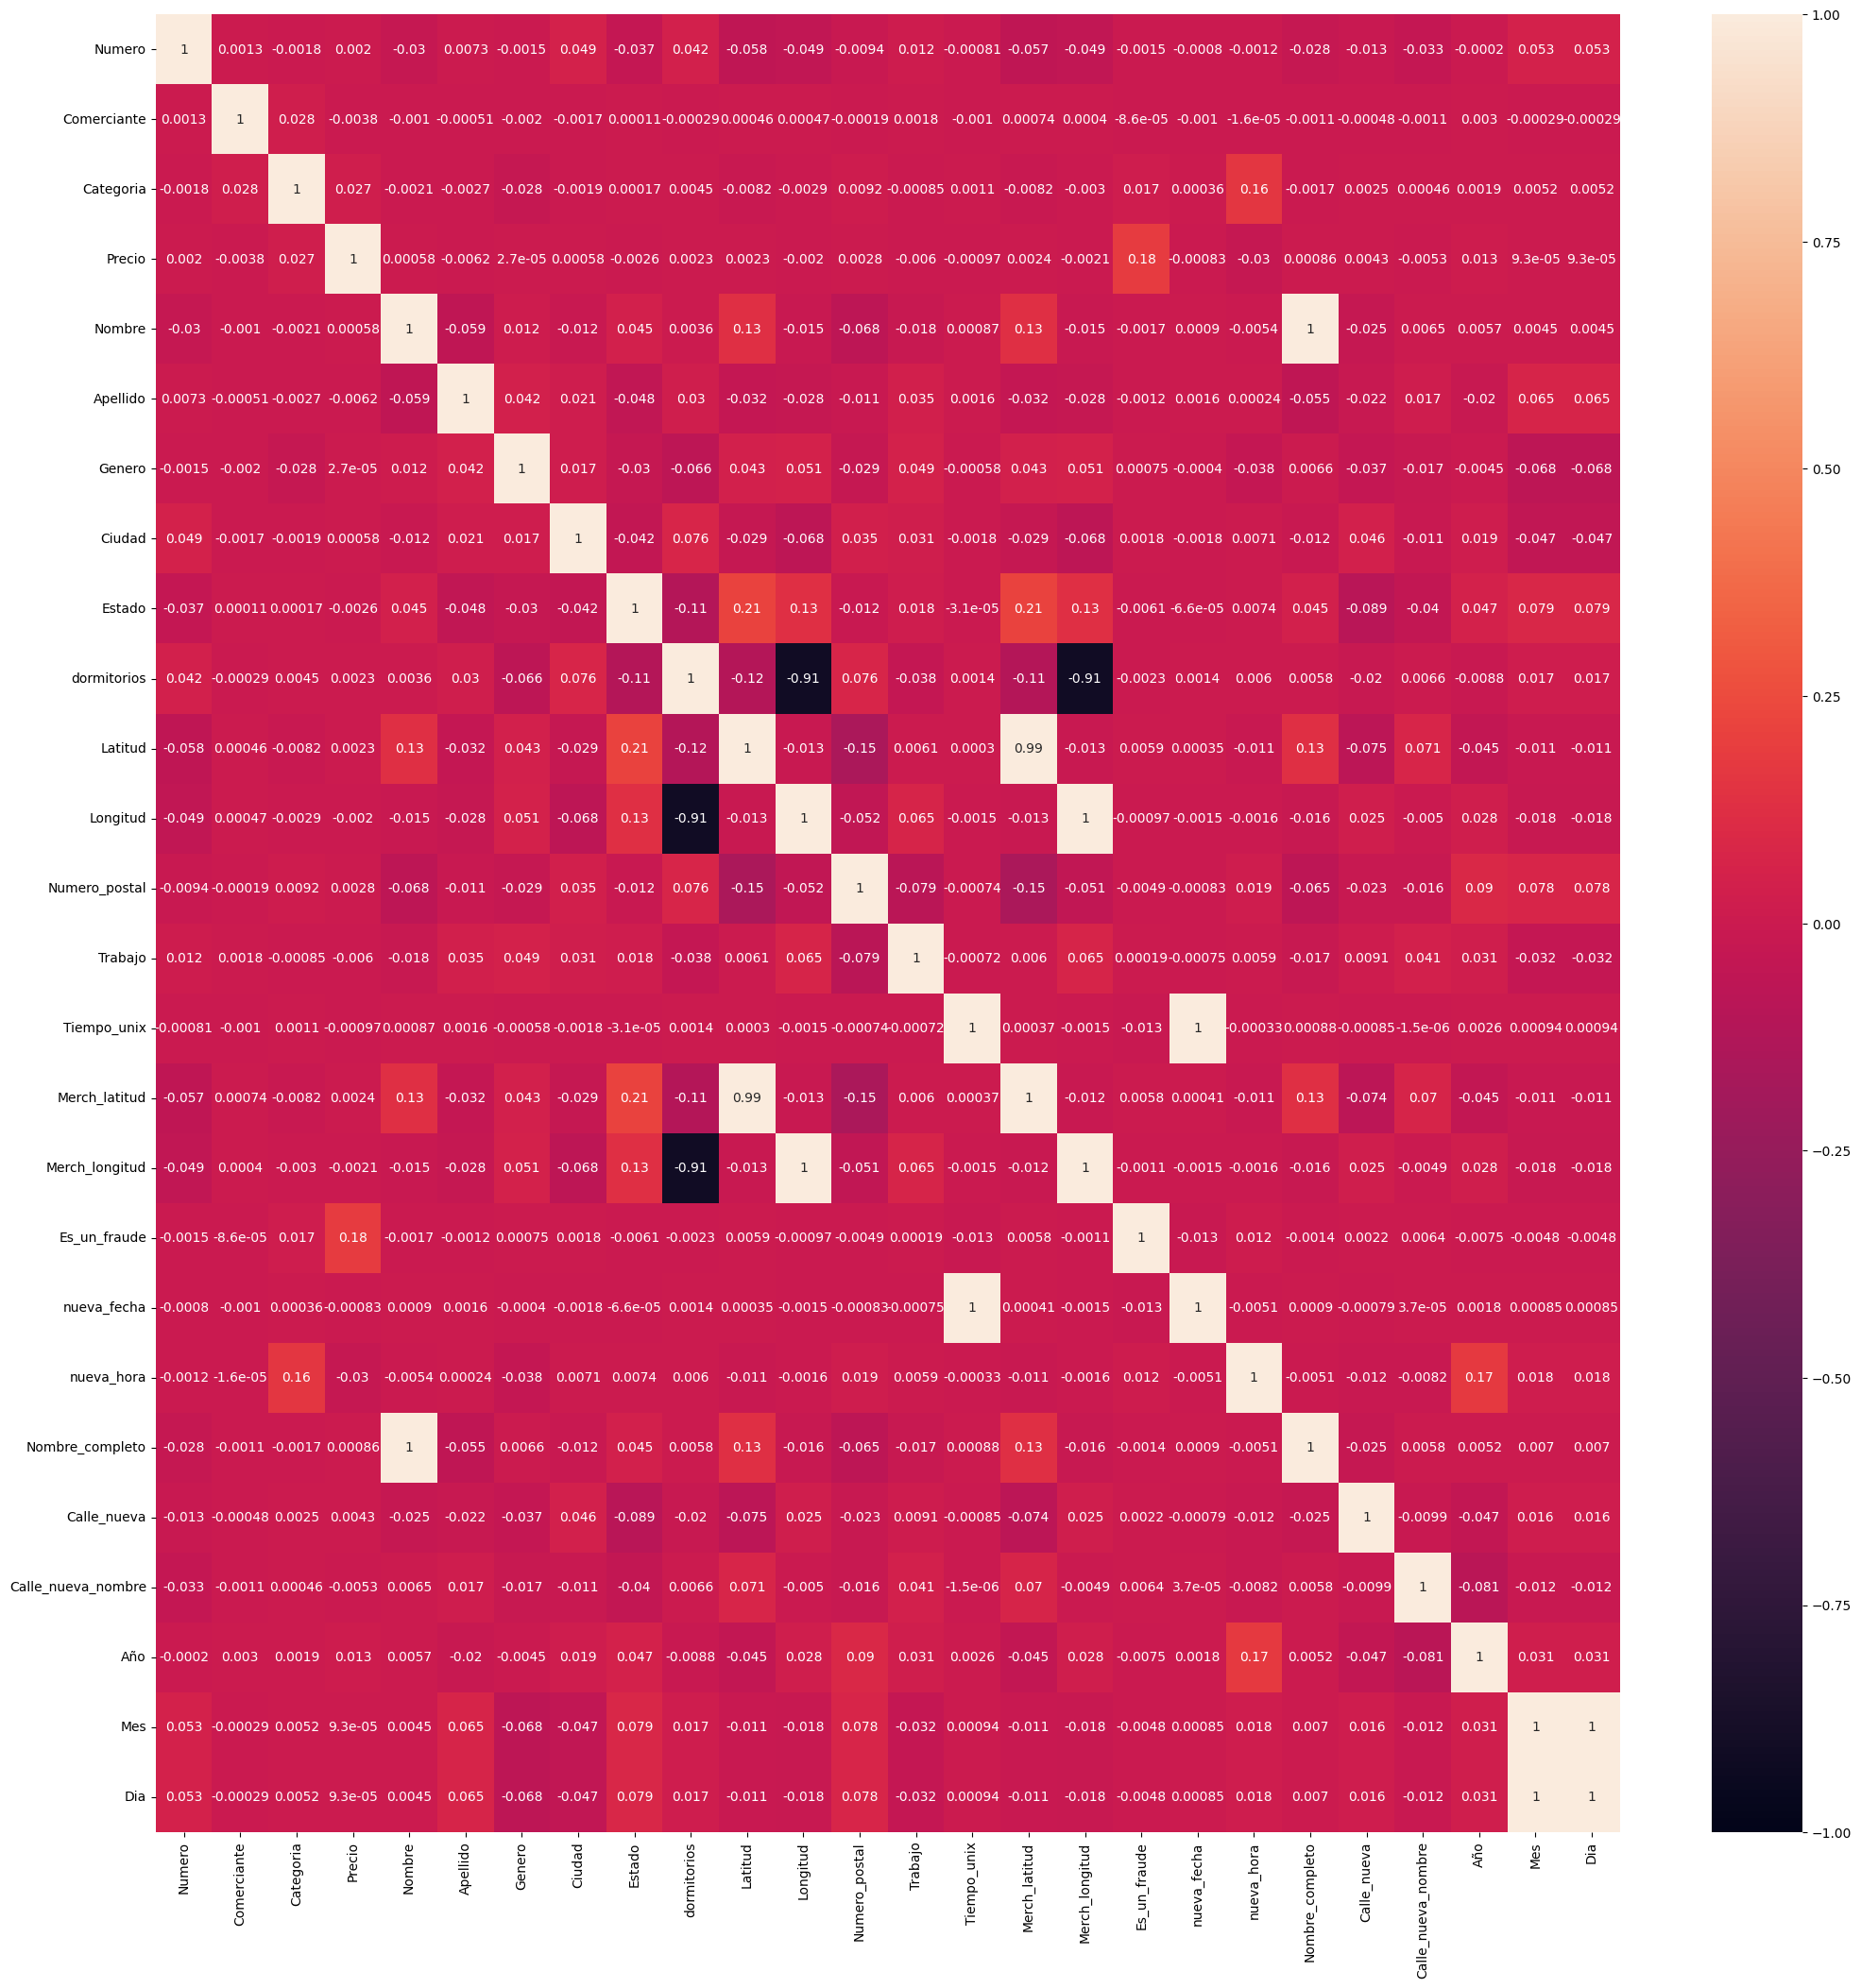

,Es_un_fraude
Es_un_fraude,1.000000
Precio,0.182267


In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Utilizamos un mapa de calor donde muestre la correlación entre las variables.
plt.figure(figsize=(25, 25))
correlacion = df14.corr()
sns.heatmap(correlacion, annot=True, vmin=-1.0, vmax=1.0)
plt.show()


cor = abs(correlacion["Es_un_fraude"])

# Seleccionar aquellas variables que son significantes para la predicción del sílice. Elegimos las variables con más de 0,15 de correlación.
variables_relevantes = cor[cor>0.1]
variables_relevantes.sort_values(ascending=False)

In [158]:
cor = abs(correlacion["Es_un_fraude"])

# Seleccionar aquellas variables que son significantes para la predicción del sílice. Elegimos las variables con más de 0,15 de correlación.
variables_relevantes = cor
variables_relevantes.sort_values(ascending=False)

,Es_un_fraude
Es_un_fraude,1.000000
Precio,0.182267
Categoria,0.016980
nueva_fecha,0.013121
Tiempo_unix,0.013066
nueva_hora,0.011693
Año,0.007513
Calle_nueva_nombre,0.006416
Estado,0.006075
Latitud,0.005863


In [159]:
# Elegimos las variables más relevantes.nueva_hora
df15 = df14[['Es_un_fraude','Categoria', 'nueva_hora', 'Año', 'Genero', 'nueva_fecha','Tiempo_unix','Nombre_completo','Nombre','Calle_nueva','Trabajo','dormitorios','Numero_postal']]
df15.head()

,Es_un_fraude,Categoria,nueva_hora,Año,Genero,nueva_fecha,Tiempo_unix,Nombre_completo,Nombre,Calle_nueva,Trabajo,dormitorios,Numero_postal
0,0,10,43779,1968,1,0,1371816865,377,151,351,141,29209,333497
1,0,10,43787,1990,0,0,1371816873,428,163,3638,36,84002,302
2,0,5,43807,1970,0,0,1371816893,70,24,9333,222,11710,34496
3,0,9,43829,1987,1,0,1371816915,109,42,32941,130,32780,54767
4,0,13,43831,1955,1,0,1371816917,678,247,5783,130,49632,1126


In [160]:
from sklearn.preprocessing import MinMaxScaler

columnas = ['Categoria', 'nueva_hora', 'Año','nueva_fecha','Tiempo_unix','Nombre_completo','Nombre','Calle_nueva','Trabajo','dormitorios','Numero_postal']
scaler = MinMaxScaler()
df15[columnas] = scaler.fit_transform(df15[columnas])
df15

<ipython-input-160-5c76881bc76d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15[columnas] = scaler.fit_transform(df15[columnas])


,Es_un_fraude,Categoria,nueva_hora,Año,Genero,nueva_fecha,Tiempo_unix,Nombre_completo,Nombre,Calle_nueva,Trabajo,dormitorios,Numero_postal
0,0,0.769231,0.508520,0.543210,1,0.0,0.000000e+00,0.411572,0.444118,0.003519,0.540230,0.283305,0.114727
1,0,0.769231,0.508613,0.814815,0,0.0,4.785402e-07,0.467249,0.479412,0.036476,0.137931,0.838654,0.000096
2,0,0.384615,0.508845,0.567901,0,0.0,1.674891e-06,0.076419,0.070588,0.093577,0.850575,0.105945,0.011860
3,0,0.692308,0.509101,0.777778,1,0.0,2.990876e-06,0.118996,0.123529,0.330282,0.498084,0.319498,0.018834
4,0,1.000000,0.509124,0.382716,1,0.0,3.110511e-06,0.740175,0.726471,0.057983,0.498084,0.490300,0.000379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0,0.384615,0.999396,0.518519,1,1.0,9.999984e-01,0.703057,0.691176,0.005595,0.816092,0.630382,0.000171
555715,0,0.538462,0.999419,0.925926,1,1.0,9.999985e-01,0.493450,0.502941,0.005735,0.961686,0.773423,0.009879
555716,0,0.538462,0.999489,0.703704,0,1.0,9.999989e-01,0.064410,0.052941,0.001444,0.176245,0.993939,0.001260
555717,0,1.000000,0.999593,0.506173,1,1.0,9.999994e-01,0.311135,0.326471,0.070386,0.061303,0.835016,0.000036


In [161]:
features_v1 = df15.drop(columns=['Es_un_fraude']) # propiedades que usamos para hacer nuestra predicción
labels_v1 = df15[['Es_un_fraude']] # objetivo que intentamos predecir

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_v1, labels_v1, test_size=0.2, random_state=100)

In [163]:
from sklearn import linear_model

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [164]:
from sklearn import metrics

# Predecimos los valores de  usando las features de test.
prediccion = lr_multiple.predict(X_test)
# Calculamos algunas métricas para conocer si el modelo es óptimo o no.
error = metrics.mean_absolute_error(y_test, prediccion)
precision = 1 - error
coef_deter = metrics.r2_score(y_test, prediccion)

# Visualizamos los resultados.
print('Error absoluto de la predicción:', error)
print('Precisión de la predicción:', precision)
print('Coeficiente de determinación:', coef_deter) # Da el mismo resultado que si pondríamos lr_multiple.score(X_test, y_test)

Error absoluto de la predicción: 0.008491755890467703
Precisión de la predicción: 0.9915082441095323
Coeficiente de determinación: 0.0047315275193543505


### **RED NEURONAL**

Primero miramos las columnas que tiene `features` para establecer las entradas de la red neuronal.

In [168]:
X_train.shape

(444575, 12)

In [169]:
import tensorflow as tf


# Para red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# El modelo será secuencial --> es el más básico
model_v0 = Sequential()
'''Capas denas --> tienen conexiones desde cada neurona hacia todas las neuronas de la siguiente capa.
Esta capa tendrá 12 neuronas de entrada'''
model_v0.add(Dense(12, activation='relu', input_shape=(12,)))
model_v0.add(Dropout(.2))
model_v0.add(Dense(6, activation='relu'))
model_v0.add(Dropout(.2))
model_v0.add(Dense(1, activation='sigmoid'))

'''Compilamos el modelo, las métricas y el optimizador.
  - Optimizador: Adam --> permite a la red como ajustar los pesos y sesgos de manera eficiente para que pueda aprender --> Siempre mejorará.
  - Función de perdida: entropía cruzada binaria -->  la columna 'cancelacionCliente' tiene valores binarios.
  - Métrica: precisión --> nos dice el porcentaje de aciertos de la predicción con respecto a los valores reales. 	'''
model_v0.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_v0.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [170]:
# Para entrenar usamos la función .fit --> indicamos  los datos de entrada (features) y resultados esperados (labels). Indicamos cuántas veces se quiere entrenar (epochs)
entrenamiento_v0 = model_v0.fit(X_train, y_train, epochs=5, batch_size=5)

Epoch 1/5
88915/88915 ━━━━━━━━━━━━━━━━━━━━ 146s 2ms/step - accuracy: 0.9949 - loss: 0.0367
Epoch 2/5
88915/88915 ━━━━━━━━━━━━━━━━━━━━ 197s 2ms/step - accuracy: 0.9961 - loss: 0.0256
Epoch 3/5
88915/88915 ━━━━━━━━━━━━━━━━━━━━ 141s 2ms/step - accuracy: 0.9961 - loss: 0.0252
Epoch 4/5
88915/88915 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step - accuracy: 0.9960 - loss: 0.0260
Epoch 5/5
88915/88915 ━━━━━━━━━━━━━━━━━━━━ 140s 2ms/step - accuracy: 0.9961 - loss: 0.0253


In [171]:
perdida, precision = model_v0.evaluate(X_test,y_test)

print("Pérdida:", perdida)
print("Precisión:", precision)

3474/3474 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9962 - loss: 0.0250
Pérdida: 0.0244752187281847
Precisión: 0.9962751269340515


In [173]:
# Imprimir las primeras filas del DataFrame
print(df.head())

# Imprimir los nombres de las columnas del DataFrame
print(df.columns)

# Asegurarse de que la columna/índice existe antes de acceder
if 'nombre_columna' in df.columns:
    print(df['nombre_columna'])
else:
    print("La columna 'nombre_columna' no existe.")

# Para acceder a una fila específica
try:
    print(df.loc[0])  # Reemplaza 0 con el índice que estés usando
except KeyError:
    print("El índice 0 no existe.")



   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

# 2.5) PREDICCIONES

In [180]:
from sklearn.metrics import classification_report, confusion_matrix


# Asumiendo que X_test es tu conjunto de datos de prueba
# Aquí se hace la predicción
predicciones_probabilidades = model_v0.predict(X_test)

# Convertimos las probabilidades a etiquetas (0 o 1)
# Usaremos un umbral de 0.3
umbral = 0.3
predicciones_clasificacion = (predicciones_probabilidades > umbral).astype(int)

# Convertir las predicciones a un DataFrame para un mejor manejo
resultados = pd.DataFrame({
    'Transacción': np.arange(len(predicciones_clasificacion)),
    'Probabilidad': predicciones_probabilidades.flatten(),
    'Predicción': predicciones_clasificacion.flatten()
})

# Mostrar las primeras filas de los resultados
print(resultados.head())

# Comparar con las etiquetas reales
if 'is_fraud' in df.columns:  # Asegúrate de que 'df' tiene la columna is_fraud
    # Asegúrate de convertir a una serie de NumPy si es un DataFrame
    resultados['Etiqueta Real'] = y_test.values  # o y_test.to_numpy()
    print(resultados.head())


3474/3474 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
   Transacción  Probabilidad  Predicción
0            0      0.006011           0
1            1      0.001283           0
2            2      0.002786           0
3            3      0.005046           0
4            4      0.004033           0
   Transacción  Probabilidad  Predicción  Etiqueta Real
0            0      0.006011           0              0
1            1      0.001283           0              0
2            2      0.002786           0              0
3            3      0.005046           0              0
4            4      0.004033           0              0


In [181]:
# Generar el reporte de clasificación
print(classification_report(y_test, predicciones_clasificacion))

# Generar la matriz de confusión
cm = confusion_matrix(y_test, predicciones_clasificacion)
print("Matriz de Confusión:\n", cm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110730
           1       0.00      0.00      0.00       414

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

Matriz de Confusión:
 [[110730      0]
 [   414      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [179]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, predicciones_clasificacion)
print("Matriz de Confusión:\n", cm)

Matriz de Confusión:
 [[110730      0]
 [   414      0]]


A pesar de haber ajustado el umbral a 0.3, parece que el modelo sigue sin predecir ninguna instancia de la clase 1 (fraude). Esto sugiere que el modelo está completamente sesgado hacia la clase mayoritaria (la clase 0). Lo comprobamos con la distribucion de cantidad y clases

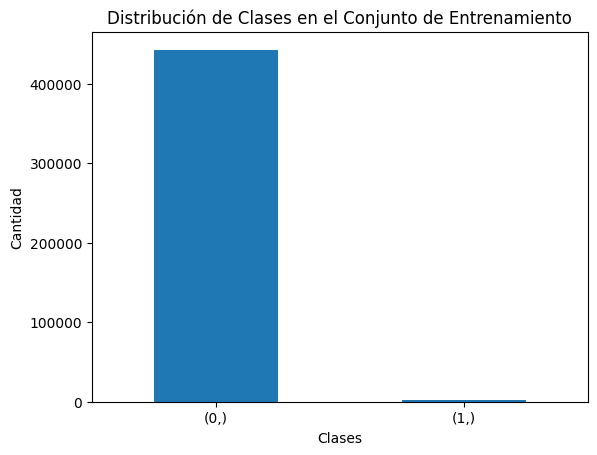

In [182]:
# Revisar la distribución de clases
import matplotlib.pyplot as plt

y_train.value_counts().plot(kind='bar')
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clases')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()
